In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score


In [2]:
data = load_breast_cancer()
X = data.data
y = data.target

print("Feature shape:", X.shape)
print("Target classes:", data.target_names)


Feature shape: (569, 30)
Target classes: ['malignant' 'benign']


In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)


In [5]:
# Linear Kernel
svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

# RBF Kernel
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

# Accuracy
print("Linear Kernel Accuracy:", accuracy_score(y_test, y_pred_linear))
print("RBF Kernel Accuracy:", accuracy_score(y_test, y_pred_rbf))


Linear Kernel Accuracy: 0.9766081871345029
RBF Kernel Accuracy: 0.9707602339181286


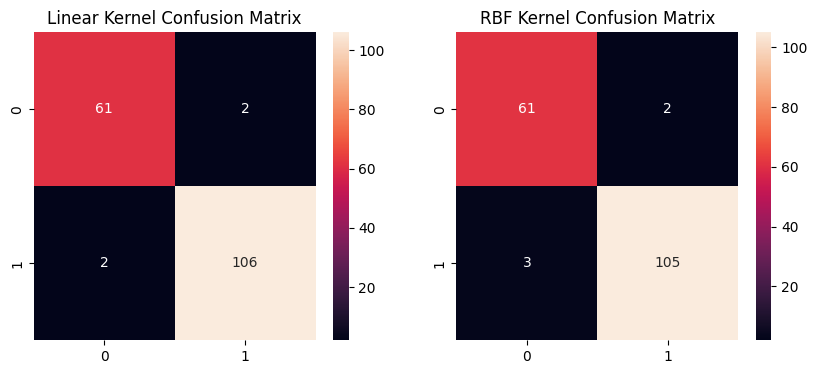

In [6]:
cm_linear = confusion_matrix(y_test, y_pred_linear)
cm_rbf = confusion_matrix(y_test, y_pred_rbf)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(cm_linear, annot=True, fmt='d')
plt.title("Linear Kernel Confusion Matrix")

plt.subplot(1, 2, 2)
sns.heatmap(cm_rbf, annot=True, fmt='d')
plt.title("RBF Kernel Confusion Matrix")

plt.show()


In [7]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.001],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Cross-Val Accuracy:", grid.best_score_)


Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Val Accuracy: 0.9672784810126581


In [8]:
cv_scores = cross_val_score(SVC(kernel='rbf', C=1, gamma='scale'), X_scaled, y, cv=5)
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Average CV Accuracy:", np.mean(cv_scores))


Cross-Validation Accuracy Scores: [0.97368421 0.95614035 1.         0.96491228 0.97345133]
Average CV Accuracy: 0.9736376339077782


In [9]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load dataset
data = load_breast_cancer()
X = data.data[:, :2]   # only 2 features
y = data.target
feature_names = data.feature_names[:2]

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [10]:
svm_linear = SVC(kernel='linear', C=1.0)
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')

svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)


SVC()

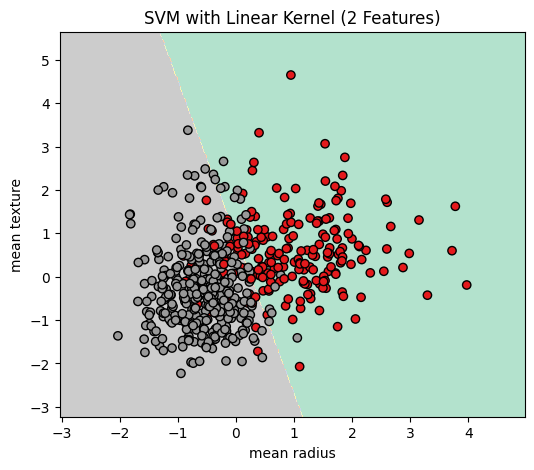

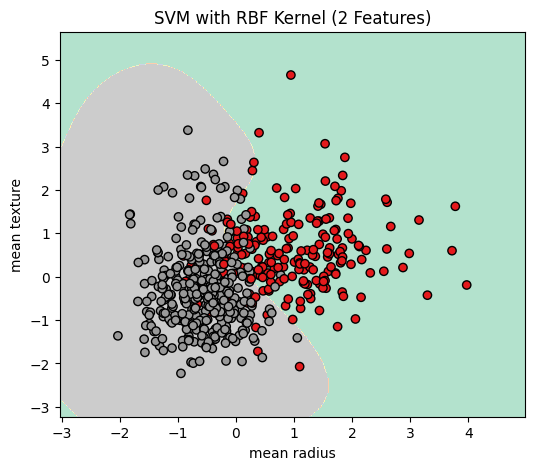

In [11]:
def plot_svm_boundary(model, X, y, title):
    # Meshgrid
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict on mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot
    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel2)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(title)
    plt.show()

# Plot both
plot_svm_boundary(svm_linear, X_scaled, y, "SVM with Linear Kernel (2 Features)")
plot_svm_boundary(svm_rbf, X_scaled, y, "SVM with RBF Kernel (2 Features)")
